### Dish is Sean Connery schpeaking. You there. Come closher...

<img src="https://media1.britannica.com/eb-media/50/66150-004-A27B7E90.jpg" alt="Title" style="width: 200px; height: 200px"/>

### I want to tell you a tale of a man. A hero. Dish is the story... of James Bond (aka Sean Connery).

<img src="https://s-media-cache-ak0.pinimg.com/originals/6f/07/54/6f075401364552cfcb3caf46f9747614.jpg" alt="Title" style="width: 150px; height: 200px"/>

In [3]:
### Print out hish movies below sonny boy. I don't have all day
import urllib2
from bs4 import BeautifulSoup
import json
import pandas as pd

soup = BeautifulSoup(urllib2.urlopen('https://en.wikipedia.org/wiki/List_of_James_Bond_films').read())

tables = soup.find_all('table', class_='wikitable')

In [162]:
raw ={
    'name' : []
}
for idx, table in enumerate(tables):
    if idx ==0:
        for idx2, row in enumerate(table.find_all('tr')):
            if idx2 > 1:
                for idx3, col in enumerate(row.find_all('th')):
                    name = col.text.split('!')
                    raw['name'] += [name[len(name) -1]]

dfnames = pd.DataFrame(raw)
dfnames['name'] = [x.replace(' ','+').replace('[N]','') for x in dfnames['name']]

### That's right boy. Pull the movie's informashon from the webshite below. Just the plot, imdb shcore, poshter, and genre should do.

In [159]:
import json
bond_movie = 'The+Spy+Who+Loved+Me'
soup = BeautifulSoup(urllib2.urlopen('http://www.omdbapi.com/?y=&plot=short&r=json&t='+bond_movie).read())
parsed_json  = json.loads(soup.text)

df = pd.DataFrame(parsed_json, index = [0])
df.head()


,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,"Roger Moore, Barbara Bach, Curd Jürgens, Richa...",Nominated for 3 Oscars. Another 2 wins & 8 nom...,UK,Lewis Gilbert,"Action, Adventure, Sci-Fi","English, Italian, Arabic",N/A,James Bond investigates the hijacking of Briti...,https://images-na.ssl-images-amazon.com/images...,PG,03 Aug 1977,True,125 min,The Spy Who Loved Me,movie,"Christopher Wood (screenplay), Richard Maibaum...",1977,tt0076752,7.1,"77,171"


In [167]:
raw =[]

for movie in dfnames['name']:
    soup = BeautifulSoup(urllib2.urlopen('http://www.omdbapi.com/?y=&plot=short&r=json&t='+movie).read())
    parsed_json  = json.loads(soup.text)
    raw += [parsed_json]

In [169]:
df = pd.DataFrame(raw)
df.head()

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,"Sean Connery, Ursula Andress, Joseph Wiseman, ...",Won 1 Golden Globe. Another 4 nominations.,UK,Terence Young,"Action, Adventure, Thriller","English, French",N/A,A resourceful British government agent seeks a...,https://images-na.ssl-images-amazon.com/images...,APPROVED,07 Oct 1962,True,110 min,Dr. No,movie,"Richard Maibaum (screenplay), Johanna Harwood ...",1962,tt0055928,7.3,"117,614"
1,"Sean Connery, Daniela Bianchi, Pedro Armendári...",Nominated for 1 Golden Globe. Another 2 wins &...,UK,Terence Young,"Action, Adventure, Thriller","English, Russian, Turkish, Romany",N/A,James Bond willingly falls into an assassinati...,http://ia.media-imdb.com/images/M/MV5BMTQxNTIz...,APPROVED,27 May 1964,True,115 min,From Russia with Love,movie,"Richard Maibaum (screenplay), Johanna Harwood ...",1963,tt0057076,7.5,"89,790"
2,"Sean Connery, Honor Blackman, Gert Fröbe, Shir...",Won 1 Oscar. Another 3 wins & 6 nominations.,UK,Guy Hamilton,"Action, Adventure, Thriller","English, Chinese, Spanish",N/A,"Investigating a gold magnate's smuggling, Jame...",http://ia.media-imdb.com/images/M/MV5BMTQ2MzE0...,APPROVED,09 Jan 1965,True,110 min,Goldfinger,movie,"Richard Maibaum (screenplay), Paul Dehn (scree...",1964,tt0058150,7.8,"140,057"
3,"Sean Connery, Claudine Auger, Adolfo Celi, Luc...",Won 1 Oscar. Another 3 wins & 5 nominations.,UK,Terence Young,"Action, Adventure, Thriller","English, French",N/A,James Bond heads to The Bahamas to recover two...,https://images-na.ssl-images-amazon.com/images...,APPROVED,22 Dec 1965,True,130 min,Thunderball,movie,"Richard Maibaum (screenplay), John Hopkins (sc...",1965,tt0059800,7.0,"82,909"
4,"Daniel Craig, Eva Green, Mads Mikkelsen, Judi ...",Won 1 BAFTA Film Award. Another 25 wins & 39 n...,"UK, Czech Republic, USA, Germany, Bahamas",Martin Campbell,"Action, Adventure, Thriller","English, French",80,"Armed with a licence to kill, Secret Agent Jam...",https://images-na.ssl-images-amazon.com/images...,PG-13,17 Nov 2006,True,144 min,Casino Royale,movie,"Neal Purvis (screenplay), Robert Wade (screenp...",2006,tt0381061,8.0,"475,914"


### There were shome low times in the life of James Bond. 
#### *cough* 
#### Go on boy. Show the lowesht rated show's poster.

In [171]:
from IPython.display import Image
from IPython.core.display import HTML 

a = df[df['imdbRating'] == min(df['imdbRating'])]['Poster'].values[0]

Image(url = a, width=250, height=250)


### But there were alsho high times! And glorious they were! Even though shome of them had Denise Richards. 
#### Show the highest rated show's poster. We don't have all day.

In [174]:
b = df[df['imdbRating'] == max(df['imdbRating'])]['Poster'].values[0]
Image(url = b, width=250, height=250)

### Plot his ratings over time. Has he continued to improve? Is he more badass than ever before?
#### Make a line plot with James Bonds' imdb ratings

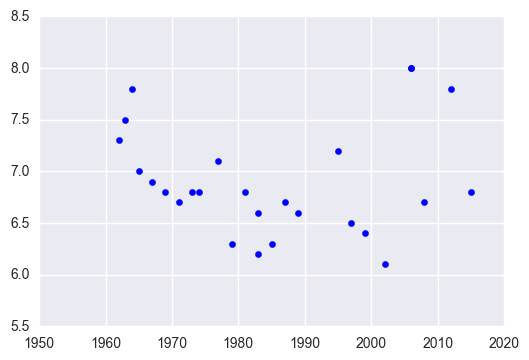

In [178]:
% matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
x =[float(i) for i in df.Year]
y =[float(i) for i in df.imdbRating]

plt.scatter(x, y, color='b')

#### Looks like he'sh making a comeback! And what a comeback it will be! For our last shcell we need to show the world that James Bond movies transhend all boundaries. Let'sh print a count of the genres for all of Mr. Bonds' movies.

In [176]:
a = set(', '.join(df.Genre.unique()).encode('ascii','ignore').split(', '))
print "List of Genre:" , a
print "Count of Genre:", len(a)

List of Genre: set(['Action', 'Adventure', 'Thriller', 'Sci-Fi'])
Count of Genre: 4


<img src="https://media1.britannica.com/eb-media/50/66150-004-A27B7E90.jpg" alt="Title" style="width: 200px; height: 200px"/>

## And that's my shtory shonny boy. Like it or not, James Bond was a hell of a guy. This is Sean Connery signing out.